In [ ]:
import torch
print("GPU Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


GPU Available: True
GPU Name: Tesla T4


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import joblib
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import roc_curve, auc
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
df = pd.read_csv('/content/dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667523 entries, 0 to 2667522
Data columns (total 22 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   timestamp                 float64
 1   datapath_id               int64  
 2   flow_id                   object 
 3   ip_src                    object 
 4   tp_src                    int64  
 5   ip_dst                    object 
 6   tp_dst                    int64  
 7   ip_proto                  int64  
 8   icmp_code                 int64  
 9   icmp_type                 int64  
 10  flow_duration_sec         int64  
 11  flow_duration_nsec        int64  
 12  idle_timeout              int64  
 13  hard_timeout              int64  
 14  flags                     int64  
 15  packet_count              int64  
 16  byte_count                int64  
 17  packet_count_per_second   float64
 18  packet_count_per_nsecond  float64
 19  byte_count_per_second     float64
 20  byte_count_per_nsecond  

In [ ]:
X = df.drop(['timestamp', 'datapath_id','flow_id', 'label'], axis=1)
y = df['label']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667523 entries, 0 to 2667522
Data columns (total 18 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ip_src                    object 
 1   tp_src                    int64  
 2   ip_dst                    object 
 3   tp_dst                    int64  
 4   ip_proto                  int64  
 5   icmp_code                 int64  
 6   icmp_type                 int64  
 7   flow_duration_sec         int64  
 8   flow_duration_nsec        int64  
 9   idle_timeout              int64  
 10  hard_timeout              int64  
 11  flags                     int64  
 12  packet_count              int64  
 13  byte_count                int64  
 14  packet_count_per_second   float64
 15  packet_count_per_nsecond  float64
 16  byte_count_per_second     float64
 17  byte_count_per_nsecond    float64
dtypes: float64(4), int64(12), object(2)
memory usage: 366.3+ MB


In [ ]:
X['ip_src'] = X['ip_src'].str.replace('.', '').astype('int64')
X['ip_dst'] = X['ip_dst'].str.replace('.', '').astype('int64')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667523 entries, 0 to 2667522
Data columns (total 18 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ip_src                    int64  
 1   tp_src                    int64  
 2   ip_dst                    int64  
 3   tp_dst                    int64  
 4   ip_proto                  int64  
 5   icmp_code                 int64  
 6   icmp_type                 int64  
 7   flow_duration_sec         int64  
 8   flow_duration_nsec        int64  
 9   idle_timeout              int64  
 10  hard_timeout              int64  
 11  flags                     int64  
 12  packet_count              int64  
 13  byte_count                int64  
 14  packet_count_per_second   float64
 15  packet_count_per_nsecond  float64
 16  byte_count_per_second     float64
 17  byte_count_per_nsecond    float64
dtypes: float64(4), int64(14)
memory usage: 366.3 MB


In [ ]:
y.value_counts()

,count
label,
1,1760670
0,906853


In [ ]:
print(f"X: {X.shape}")
print(f"y: {y.shape}")

X: (2667523, 18)
y: (2667523,)


Chia dữ liệu thành thành tập huấn luyện và tập kiểm thử

> Add blockquote



In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=28)

X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
# Display X_train and y_train as a table
train_df = pd.DataFrame(X_train)
train_df['label'] = y_train
display("Train Set:", train_df.head())
# Display X_val and y_val as a table
val_df = pd.DataFrame(X_val)
val_df['label'] = y_val
display("Validation Set:", val_df.head())

'Train Set:'

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,label
0,1.782150e+10,0.0,100017.0,0.0,1.0,0.0,8.0,11.0,809000000.0,20.0,100.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,1
1,1.031293e+10,17294.0,10001.0,80.0,6.0,-1.0,-1.0,3.0,324000000.0,20.0,100.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,1
2,1.000100e+04,5050.0,10006.0,32800.0,6.0,-1.0,-1.0,17.0,503000000.0,20.0,100.0,0.0,157246.0,10378236.0,9249.764706,3.126163e-04,610484.470588,0.020633,0
3,1.000700e+04,0.0,100011.0,0.0,1.0,0.0,8.0,82.0,478000000.0,20.0,100.0,0.0,82.0,8036.0,1.000000,1.715481e-07,98.000000,0.000017,0
4,1.977621e+10,8596.0,10001.0,80.0,6.0,-1.0,-1.0,12.0,42000000.0,20.0,100.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,1


'Validation Set:'

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,label
0,2.538923e+09,36389.0,10004.0,0.0,17.0,-1.0,-1.0,4.0,841000000.0,20.0,100.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,1
1,1.000110e+05,5051.0,100016.0,40506.0,1.0,0.0,0.0,39.0,237000000.0,20.0,100.0,0.0,38.0,3.724000e+03,0.974359,1.603376e-07,9.548718e+01,0.000016,0
2,1.001567e+10,37063.0,10004.0,0.0,17.0,-1.0,-1.0,1.0,478000000.0,20.0,100.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,1
3,1.000140e+05,56926.0,10001.0,5050.0,6.0,0.0,8.0,8.0,535000000.0,20.0,100.0,0.0,464059.0,2.646300e+10,58007.375000,8.674000e-04,3.307875e+09,49.463545,0
4,4.896872e+08,5643.0,10001.0,0.0,17.0,-1.0,-1.0,4.0,998000000.0,20.0,100.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,1


In [ ]:
print(f"Train: {X_train.shape} {y_train.shape}")
print(f"Val: {X_val.shape} {y_val.shape}")
numOfRightAnwser = 0
y_true = []


Train: (1867266, 18) (1867266,)
Val: (800257, 18) (800257,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# === TRAINING ===
print("Đang huấn luyện mô hình KNN...")
knn_model = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')  # Bạn có thể thử 'kd_tree'
knn_model.fit(X_train, y_train)





Đang huấn luyện mô hình KNN...


KNeighborsClassifier(algorithm='kd_tree')

In [ ]:
# === PREDICTING ===
print("\nĐang dự đoán tập validation...")
y_pred_knn = knn_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_knn)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# === IN RA DỰ ĐOÁN VÀ NHÃN THẬT ===
print("\nChi tiết dự đoán:")
for i in range(len(y_val)):
    print(f"label: {y_val[i]} -> predicted: {y_pred_knn[i]}")

Streaming output truncated to the last 5000 lines.
label: 0 -> predicted: 0
label: 1 -> predicted: 1
label: 1 -> predicted: 1
label: 0 -> predicted: 0
label: 0 -> predicted: 0
label: 0 -> predicted: 0
label: 1 -> predicted: 1
label: 0 -> predicted: 0
label: 1 -> predicted: 1
label: 0 -> predicted: 0
label: 1 -> predicted: 1
label: 0 -> predicted: 0
label: 1 -> predicted: 1
label: 1 -> predicted: 1
label: 1 -> predicted: 1
label: 1 -> predicted: 1
label: 0 -> predicted: 0
label: 0 -> predicted: 0
label: 1 -> predicted: 1
label: 1 -> predicted: 1
label: 1 -> predicted: 1
label: 1 -> predicted: 1
label: 1 -> predicted: 1
label: 1 -> predicted: 1
label: 0 -> predicted: 0
label: 1 -> predicted: 1
label: 1 -> predicted: 1
label: 1 -> predicted: 1
label: 0 -> predicted: 0
label: 0 -> predicted: 0
label: 1 -> predicted: 1
label: 0 -> predicted: 0
label: 1 -> predicted: 1
label: 0 -> predicted: 0
label: 0 -> predicted: 0
label: 0 -> predicted: 0
label: 1 -> predicted: 1
label: 1 -> predicted: 1

Confusion matrix, without normalization


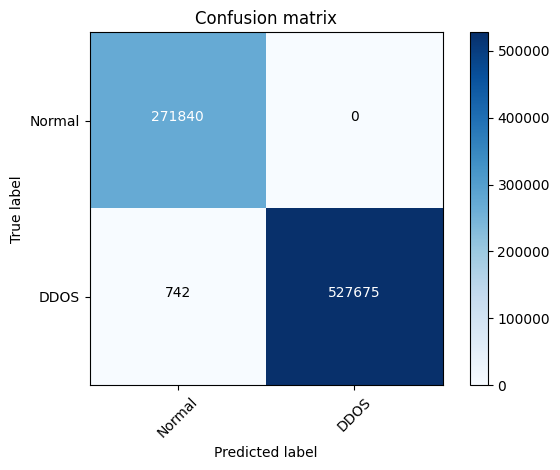

In [ ]:
cm = np.array([[271840, 0],
               [742, 527675]])
# Optional: Visualize the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plt.figure()
plot_confusion_matrix(cm, classes=['Normal', 'DDOS'], title='Confusion matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Đảm bảo bạn dùng đúng nhãn thật y_val
accuracy = accuracy_score(y_val, y_pred_knn)
precision = precision_score(y_val, y_pred_knn, average='macro')
recall = recall_score(y_val, y_pred_knn, average='macro')

# In kết quả
print("✅ Accuracy:", round(accuracy * 100, 2), "%")
print("🎯 Precision (macro):", round(precision * 100, 2), "%")
print("📢 Recall (macro):", round(recall * 100, 2), "%")


✅ Accuracy: 99.91 %
🎯 Precision (macro): 99.86 %
📢 Recall (macro): 99.93 %
